# Converting the vibrations(acceleration vs Time) to PSD #  measured from Bike using accelerometer from Mobile using INVH app
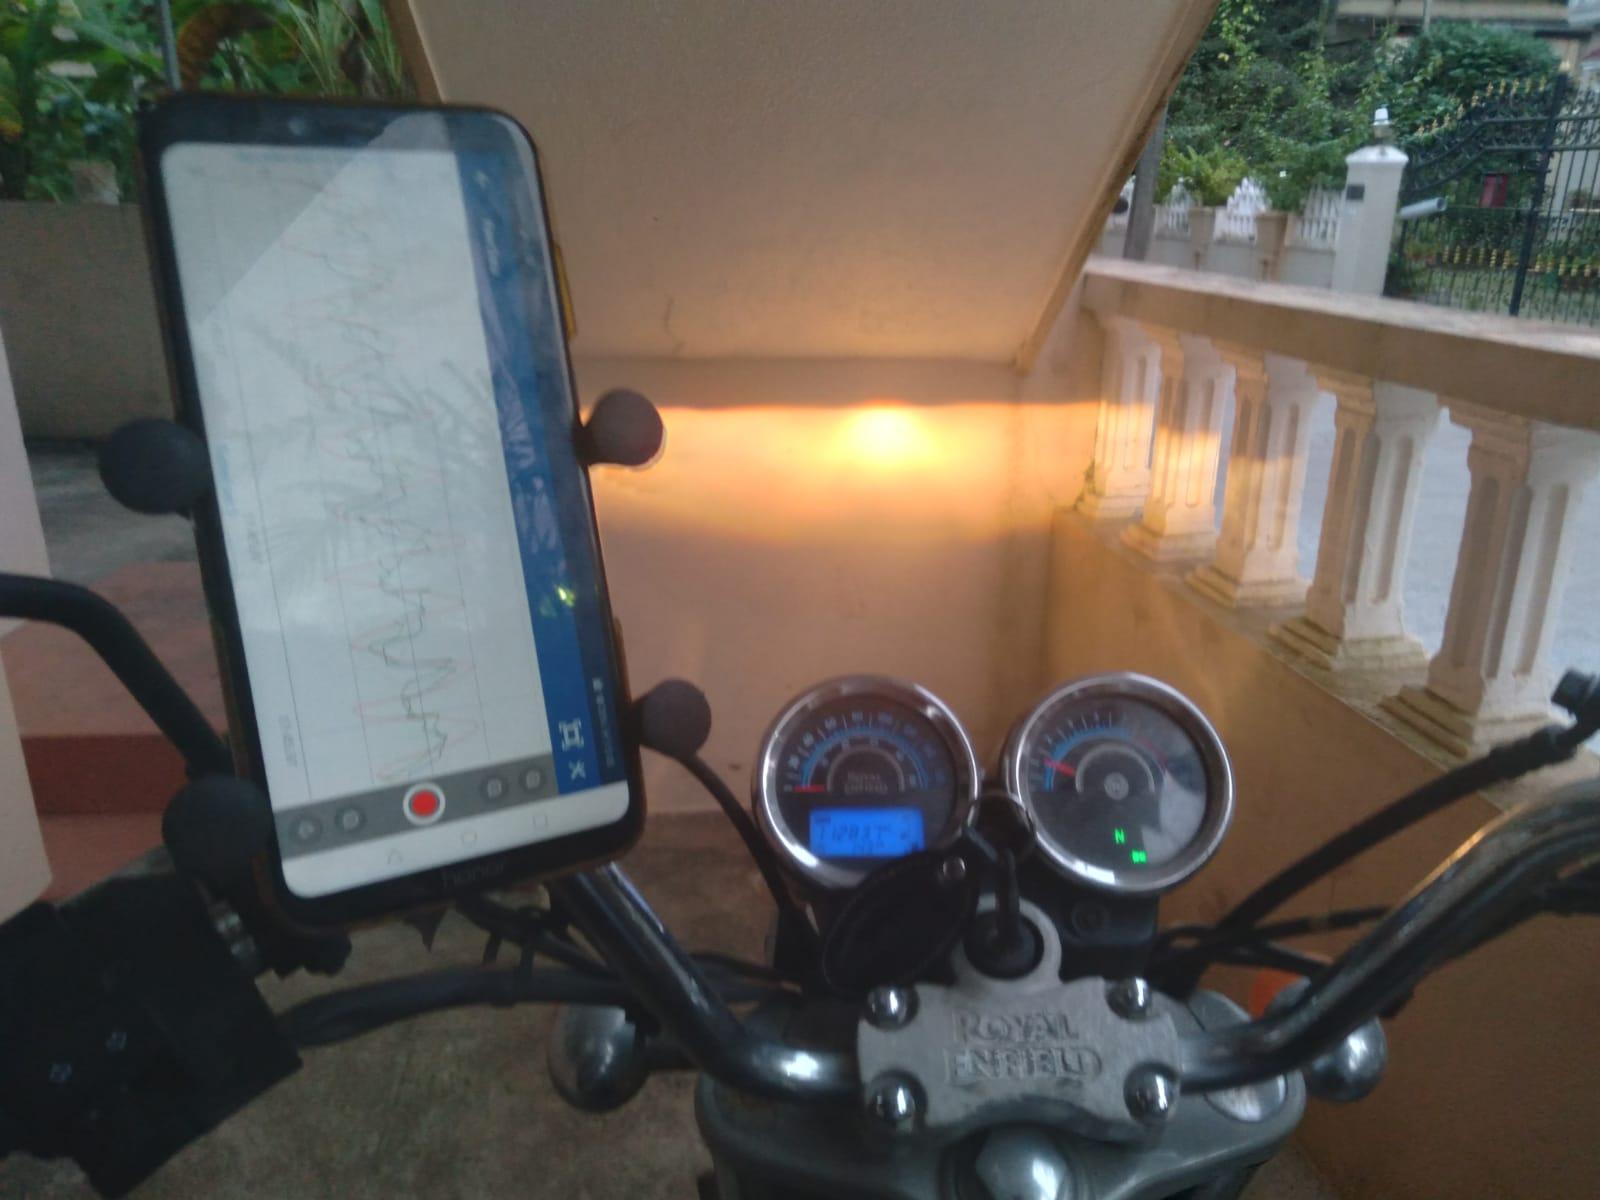

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy import signal

# Import CSV File

In [2]:
df = pd.read_csv('C:/Explore/ML_AI/Bike.csv',index_col=False)
#df = pd.read_csv(filenames[0])
df.head()

Time (s)  X-Axis (m/s2)  Y- Axis (m/s2)  Z-Axis (m/s2)
0     0.000      -0.304078       -0.102339      -0.079496
1     0.004      -0.189663       -0.055072       0.336484
2     0.008       0.018629        0.038250       0.290241
3     0.012       0.148902       -0.051707      -0.049197
4     0.016       0.226321       -0.039458      -0.115934

In [44]:
df.dtypes[df.dtypes == 'float64'].index

Index(['Time (s)', 'X-Axis (m/s2)', 'Y- Axis (m/s2)', 'Z-Axis (m/s2)'], dtype='object')

In [3]:
df.columns = ['Time (s)', 'Acc_X (m/s2)','Acc_Y (m/s2)','Acc_Z (m/s2)']

In [4]:
df = df.set_index('Time (s)')
df

Acc_X (m/s2)  Acc_Y (m/s2)  Acc_Z (m/s2)
Time (s)                                          
0.000        -0.304078     -0.102339     -0.079496
0.004        -0.189663     -0.055072      0.336484
0.008         0.018629      0.038250      0.290241
0.012         0.148902     -0.051707     -0.049197
0.016         0.226321     -0.039458     -0.115934
...                ...           ...           ...
1.268         0.002648     -0.129041     -0.021482
1.272        -0.061050     -0.051549     -0.204784
1.276        -0.113924      0.113813     -0.186804
1.280        -0.144739      0.290141     -0.049898
1.284        -0.155991      0.325904     -0.078203

[322 rows x 3 columns]

# Plot Data

## Use Matplotlib (Built Into Pandas)

<AxesSubplot:xlabel='Time (s)'>

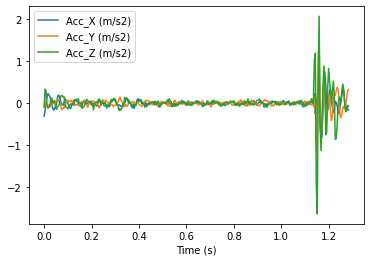

In [5]:
df.plot()

<AxesSubplot:xlabel='Time (s)'>

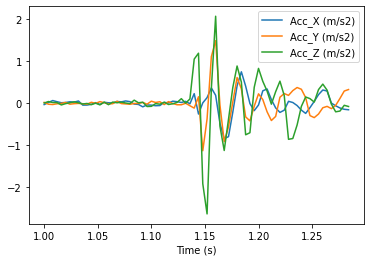

In [6]:
df[1:3].plot()

## Interactive Version Using Plotly

In [7]:
def fig_from_df(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

In [8]:
fig = fig_from_df(df)
fig.write_html('time-history.html',full_html=False,include_plotlyjs='cdn')
fig.show()

In [10]:
fig_from_df(df[1:3]).show()

# Generate PSD

In [11]:
def get_psd(df,bin_width):
  fs = len(df)/(df.index[-1]-df.index[0])
  f, psd = signal.welch(df.to_numpy(), 
                        fs=fs, 
                        nperseg=fs/bin_width,
                        window='hanning',
                        axis=0
                        )

  df_psd = pd.DataFrame(psd,columns=df.columns)
  df_psd.columns
  df_psd['Frequency (Hz)'] = f
  return df_psd.set_index('Frequency (Hz)')

In [12]:
psd = get_psd(df,1.0)
psd

Acc_X (m/s2)  Acc_Y (m/s2)  Acc_Z (m/s2)
Frequency (Hz)                                          
0.000000        1.857002e-06  2.434415e-06  5.601060e-06
1.003115        1.905031e-06  2.372116e-06  3.969814e-06
2.006231        9.451848e-08  5.095677e-08  1.047535e-06
3.009346        1.258425e-06  2.206059e-06  3.132984e-06
4.012461        1.981643e-06  5.288939e-06  1.807575e-06
...                      ...           ...           ...
121.376947      1.864411e-06  7.819444e-06  2.487720e-05
122.380062      6.926928e-06  6.130393e-06  3.179680e-06
123.383178      1.880531e-06  1.735150e-06  6.445460e-06
124.386293      1.656572e-06  1.159983e-07  6.605036e-06
125.389408      4.937140e-06  3.079148e-09  4.945894e-07

[126 rows x 3 columns]

In [13]:
def get_psd_plot(df_psd):
  fig = fig_from_df(df_psd.iloc[1:])
  fig.update_xaxes(type="log",title_text="Frequency (Hz)")
  fig.update_yaxes(type="log",title_text="Acceleration (g^2/s)")
  return fig

In [14]:
fig = get_psd_plot(psd)
fig.show()

# Show PSD with Different Linear Spaced Bin Widths

## Change Bin Width to 10 Hz

In [25]:
get_psd_plot(get_psd(df,8)).show()

# Save Plot & CSV

In [29]:
fig.write_html('psd.html',full_html=False,include_plotlyjs='cdn')
psd.to_csv('C:/Explore/ML_AI/psd.csv')
df1 = pd.read_csv('C:/Explore/ML_AI/psd.csv',index_col=False)
#df = pd.read_csv(filenames[0])
df1.head()

Frequency (Hz)  Acc_X (m/s2)  Acc_Y (m/s2)  Acc_Z (m/s2)
0        0.000000  1.857002e-06  2.434415e-06      0.000006
1        1.003115  1.905031e-06  2.372116e-06      0.000004
2        2.006231  9.451848e-08  5.095677e-08      0.000001
3        3.009346  1.258425e-06  2.206059e-06      0.000003
4        4.012461  1.981643e-06  5.288939e-06      0.000002